## I created a model that can understand emotions from pictures of people's faces using the FER 2013 dataset. First, I prepared the data by making the pictures similar and organizing the emotions. Then, I built a special system called a CNN that's great at understanding pictures. I used tools like TensorFlow and Keras to teach the system with a method called Adam and checked its mistakes with something called categorical crossentropy. I also used a trick called dropout to stop it from learning too much. After all this, I tested the system, and it did a good job at recognizing emotions. This is cool because it can help machines work better with people. In the future, I'll make the system even smarter, add more types of faces, and make it work in real-time.




Epoch 1/50


449/449 [==============================] - 19s 40ms/step - loss: 1.7416 - accuracy: 0.2920 - val_loss: 1.6218 - val_accuracy: 0.3682
Epoch 2/50
449/449 [==============================] - 17s 39ms/step - loss: 1.6006 - accuracy: 0.3713 - val_loss: 1.5088 - val_accuracy: 0.4062
Epoch 3/50
449/449 [==============================] - 18s 40ms/step - loss: 1.5136 - accuracy: 0.4128 - val_loss: 1.4271 - val_accuracy: 0.4472
Epoch 4/50
449/449 [==============================] - 18s 40ms/step - loss: 1.4537 - accuracy: 0.4360 - val_loss: 1.3873 - val_accuracy: 0.4654
Epoch 5/50
449/449 [==============================] - 17s 39ms/step - loss: 1.4111 - accuracy: 0.4538 - val_loss: 1.3546 - val_accuracy: 0.4809
Epoch 6/50
449/449 [==============================] - 18s 39ms/step - loss: 1.3728 - accuracy: 0.4680 - val_loss: 1.3491 - val_accuracy: 0.4923
Epoch 7/50
449/449 [==============================] - 19s 43ms/step - loss: 1.3378 - accuracy: 0.4846 - val_loss: 1.3286 - val_accu

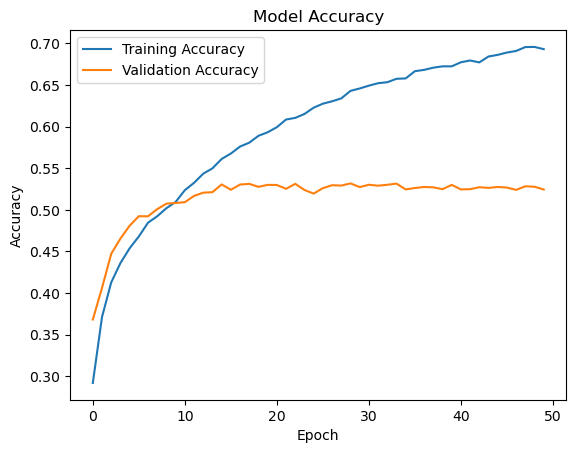

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Loading and preprocessing the data
def load_data(file_path):
    data = pd.read_csv(file_path)
    images = []
    labels = []
    
    for _, row in data.iterrows():
        pixels = np.array(row['pixels'].split(' '), dtype='float32')
        image = pixels.reshape(48, 48, 1)
        images.append(image)
        labels.append(row['emotion'])
    
    images = np.array(images) / 255.0  
    labels = to_categorical(np.array(labels))  
    return images, labels

# defining model structure
def build_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # Assuming 7 emotions
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
# I simplified the model by reducing the depth and width of the neural network, 
# Which should make it faster to train while still being capable of learning from the FER 2013 dataset. 
# Adjusting training settings and using these techniques can help find the right balance between speed and model performance.


# Main 
if __name__ == '__main__':
    # Loading and preprocessing the data
    file_path = 'C:/Users/Administrator/fer2013.csv'  
    images, labels = load_data(file_path)
    
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Building and compiling the model
    model = build_model()
    
    # Training the model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)
    
    # Plot training and validation accuracy
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()
